# This Notebook creates a ML model that can predict the survivors from the titanic shipwreck. 
## Created by iHasib at 09.09.24

This is my work for the participation in Kaggle Competition of `Titanic - Machine Learning from Disaster`. Here's the Link to the competition: https://www.kaggle.com/competitions/titanic/

In [75]:
# Importing the necessary instruments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df_train = pd.read_csv("titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# Splitting X & y
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

In [78]:
len(X), len(y)

(891, 891)

In [79]:
# Checking to see if there are missing data
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Since the `Age`, `Embarked` & `Cabin` columns have missing data, we need to deal with them before training**

### Dealing with the `Age`

In [80]:
# Finding the min & max Age
np.min(X["Age"]), np.max(X["Age"])

(0.42, 80.0)

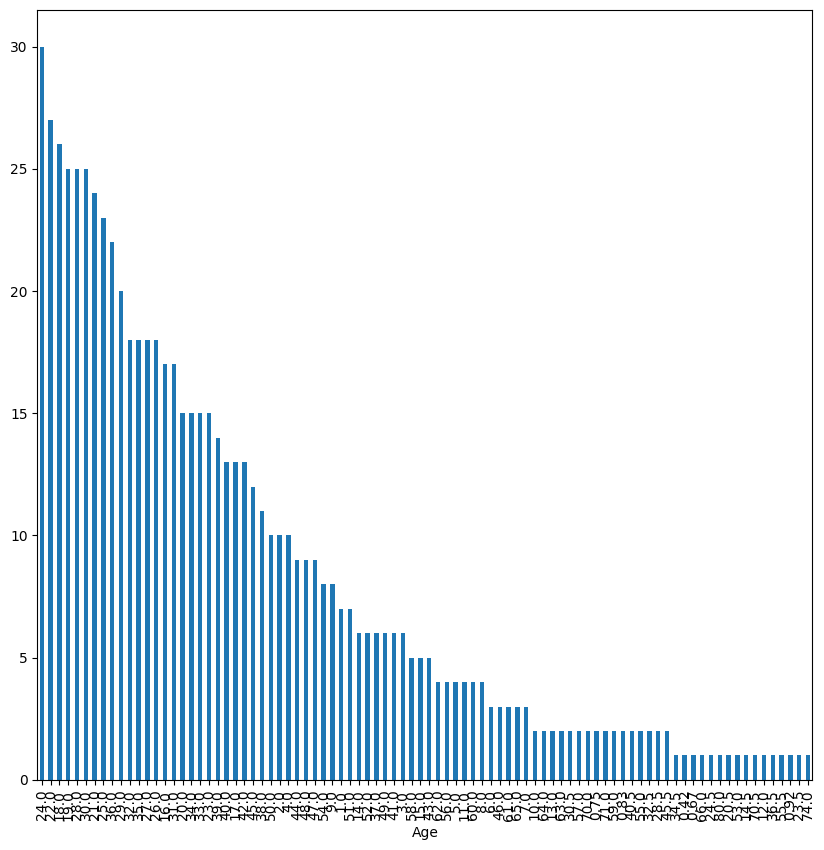

In [81]:
# Visualizing the Age Data
X["Age"].value_counts().plot.bar(figsize=(10,10));

**After Visualization, it seems like median should be the perfect option to fill!!**

In [82]:
# Filling the missing age data
X["Age"] = X["Age"].fillna(X["Age"].median())

In [83]:
# Checking to see if the missing Age data has been filled
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dealing with the `Cabin`

In [84]:
# Checking the number of unique instances of Cabin
len(X["Cabin"].unique()), len(X)

(148, 891)

In [85]:
891-148

743

In [86]:
X["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

**Since there are no classes that take up majority, so we would fill the missing values with `missing`**

In [87]:
X["Cabin"] = X["Cabin"].fillna("missing")
X.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Dealing with Embark

In [88]:
# Checking out the different types of values
X["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Since we found a majority here which is `S` (644), also since the number of missing is just 2. So we would fill the missing with 'S'**

In [89]:
# Fill the missing values and check the total missing values in the dataset
X["Embarked"] = X["Embarked"].fillna("S")
X.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Since the features are not in Binary, we need to convert them using OneHotEncoder

### Since the test data has another feature, I'd use an empty column as a dummy

In [90]:
X["Ignore"] = 0
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ignore
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,missing,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,missing,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [91]:
X#["Name"].value_counts()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ignore
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,missing,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,missing,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [92]:
X = X.drop("Name", axis=1)
X = X.drop("Ticket", axis=1)
X = X.drop("Cabin", axis=1)

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.    ,  0.    ,  1.    , ..., 22.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 38.    , 71.2833,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 26.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ..., 28.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 26.    , 30.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 32.    ,  7.75  ,  0.    ]])

In [94]:
transformed_X = pd.DataFrame(transformed_X)

In [95]:
transformed_X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,7.2500,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,38.0,71.2833,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,26.0,7.9250,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,35.0,53.1000,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,35.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,887.0,27.0,13.0000,0.0
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,888.0,19.0,30.0000,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,889.0,28.0,23.4500,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,890.0,26.0,30.0000,0.0


## Training Begins:

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(transformed_X, y, test_size=0.7)

np.random.seed(99)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [97]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_preds = clf.predict(X_val)

In [99]:
clf.score(X_val, y_val)

0.7772435897435898

## Saving the model

In [110]:
import pickle
pickle.dump(clf, open("clf_random_forest_model1_dummy.pkl", "wb"))

## Loading the model

In [111]:
loaded_model = pickle.load(open("clf_random_forest_model1_dummy.pkl", "rb"))

## Evaluating the model

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [113]:
accuracy_score(y_val, y_preds)

0.7772435897435898

In [114]:
precision_score(y_val, y_preds)

0.8114285714285714

In [115]:
recall_score(y_val, y_preds)

0.5725806451612904

In [116]:
f1_score(y_val, y_preds)

0.6713947990543735

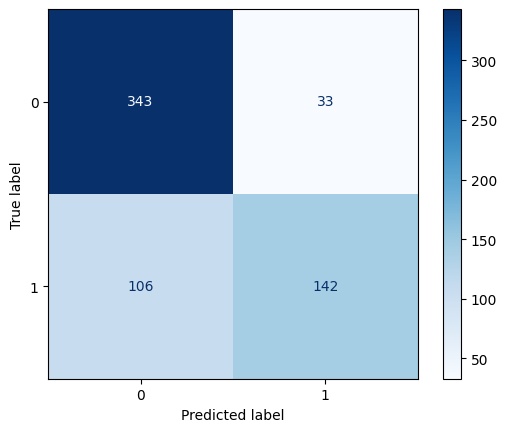

In [117]:
CMD = confusion_matrix(y_val, y_preds)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CMD)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [118]:
loaded_model.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
loaded_model_preds = loaded_model.predict(X_val)
loaded_metrics = evaluate_preds(y_val, loaded_model_preds)

Acc: 78.21%
Precision: 0.82
Recall: 0.58
F1 Score: 0.68


### Tuning the model for better Performance

In [122]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much of your computer processor is dedicated to ML

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500

In [123]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [124]:
rs_clf.score(X_test,y_test)

0.7877094972067039

In [125]:
rs_preds = rs_clf.predict(X_test)
rs_metrics=evaluate_preds(y_test, rs_preds)

Acc: 78.77%
Precision: 0.78
Recall: 0.68
F1 Score: 0.72


In [126]:
clf_2 = RandomForestClassifier(n_estimators=200, min_samples_leaf=4, min_samples_split=2, max_features="sqrt", max_depth=20)
clf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200)

In [127]:
clf_2.score(X_test, y_test)

0.8044692737430168

In [128]:
clf2_preds = clf_2.predict(X_test)
clf2_metrics = evaluate_preds(y_test, clf2_preds)

Acc: 80.45%
Precision: 0.80
Recall: 0.70
F1 Score: 0.75


In [129]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels 
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return metric_dict

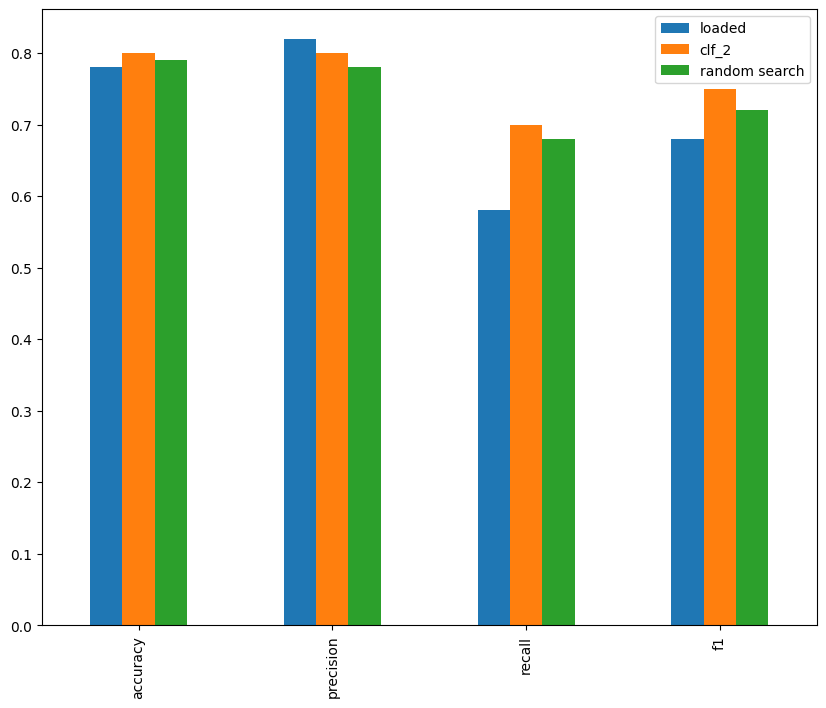

In [130]:
compare_metrics = pd.DataFrame({"loaded":loaded_metrics,
                                "clf_2": clf2_metrics,
                                "random search": rs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [131]:
loaded_model.fit(X_test, y_test)

RandomForestClassifier()

In [132]:
test = pd.read_csv("titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [133]:
test["Parch"].value_counts(), X["Parch"].value_counts()

(Parch
 0    324
 1     52
 2     33
 3      3
 4      2
 9      2
 6      1
 5      1
 Name: count, dtype: int64,
 Parch
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: count, dtype: int64)

In [134]:
test["Embarked"].value_counts(), X["Embarked"].value_counts()

(Embarked
 S    270
 C    102
 Q     46
 Name: count, dtype: int64,
 Embarked
 S    646
 C    168
 Q     77
 Name: count, dtype: int64)

In [135]:
test = test.drop("Name", axis=1)
test = test.drop("Ticket", axis=1)
test = test.drop("Cabin", axis=1)

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")

transformed_test = transformer.fit_transform(test)
transformed_test

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 8.92000e+02,
        3.45000e+01, 7.82920e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 8.93000e+02,
        4.70000e+01, 7.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 8.94000e+02,
        6.20000e+01, 9.68750e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.30700e+03,
        3.85000e+01, 7.25000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.30800e+03,
                nan, 8.05000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.30900e+03,
                nan, 2.23583e+01]])

In [137]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,7.2500,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,38.0,71.2833,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,26.0,7.9250,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,35.0,53.1000,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,35.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,887.0,27.0,13.0000,0.0
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,888.0,19.0,30.0000,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,889.0,28.0,23.4500,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,890.0,26.0,30.0000,0.0


In [139]:
testpd = pd.DataFrame(transformed_test)
testpd

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,892.0,34.5,7.8292
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,893.0,47.0,7.0000
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,894.0,62.0,9.6875
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,895.0,27.0,8.6625
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,896.0,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1305.0,NaN,8.0500
414,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1306.0,39.0,108.9000
415,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1307.0,38.5,7.2500
416,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1308.0,NaN,8.0500


In [161]:
loaded_model_test = loaded_model.predict(transformed_test)

In [144]:
clf_2_test = clf_2.predict(transformed_test)

In [160]:
rs_clf_test = rs_clf.predict(transformed_test)

In [143]:
# Saving the other 2 models
pickle.dump(rs_clf, open("rs_clf_titanic", "wb"))
pickle.dump(clf_2, open("clf_2_titanic", "wb"))

In [162]:
# Exporting for clf2
df_clf2_test = pd.DataFrame(columns=["PassengerID", "Survived"])
df_clf2_test["Survived"] = clf_2_test
df_clf2_test["PassengerID"] = np.arange(892,1310,1)
df_clf2_test

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [159]:
df_clf2_test.to_csv("myTestResults.csv", index=False)

In [153]:
pd.read_csv("titanic/gender_submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [165]:
# Exporting for rs_clf
df_rs_clf_test = pd.DataFrame(columns=["PassengerID", "Survived"])
df_rs_clf_test["Survived"] = rs_clf_test
df_rs_clf_test["PassengerID"] = np.arange(892,1310,1)
df_rs_clf_test.to_csv("myTestResults2.csv", index=False)

In [167]:
# Exporting for loaded_model
df_loaded_model_test = pd.DataFrame(columns=["PassengerID", "Survived"])
df_loaded_model_test["Survived"] = loaded_model_test
df_loaded_model_test["PassengerID"] = np.arange(892,1310,1)
df_loaded_model_test.to_csv("myTestResults3.csv", index=False)


## Loaded Model got the best score of 0.78 from Kaggle

# The End (11.09.24)